<center><h1>Lab 9:<br> Impluse and Momentum</h1></center>
<h2>Introduction</h2>
In this lab we will study the conservation of energy and momentum in both elastic and inelastic collisions. This will be achieved using an air track that minimizes energy loss due to air resistance.
<h2>Theory</h2>

<h3>Basics</h3>

The momentum of a particles is $\vec P = m \vec v$. Differentiating both sides of the equation yields Newton's equation $\frac{d \vec P}{dt} = m \frac{d \vec v}{dt} = m \vec a = \vec F$. For a system of $N$ particles, we assign momentum $\vec p_i$ to the $i$th paricle; then the sum $i$ gives the total momentum, $\vec P$, for the system:
<center>$\vec P = \sum_{i=1}^N \vec p_i$</center>
Thus, the derivative of total momentum:
<center>$\frac{d \vec P}{dt} = \sum_{i=1}^N \frac{d \vec p_i}{dt} = \sum_{i=1}^N m_i \vec a_i = \sum_{i=1}^N \vec F_i$</center>
where $\vec F_i$ is the total force on the $i$th particle. The force $\vec F_i$ can, in general, come either from another particle $j \pm i$ or from some external source. But by Newton's Third Law, any forces <u>between</u> two particles in the system will add to zero: $\vec F_{i\ on \ j} = - \vec F_{j\ on \ i}$ (They are equal and opposite). Thus, only external forces will contribute to the sum overall. Thus we have <center>$\frac{d \vec P}{dt} = \vec F_{ext} \quad (1)$</center>
If no external force acts on the system then $\frac{d \vec P}{dt} = 0$, which implies that $\vec P(t) = $constant, which means that the momentum of an isolated system (no external forces) is conserved. If the system is not isolated (<i>i.e.</i> an external force acts on it) then we have:
<center>$\vec J = \Delta \vec P = \int_{t_1}^{t_2} \vec F_{ext} dt \quad (2)$</center>
The quantity $\vec J$ is known as the impulse and measures the change in momentum caused by an external force acting from time $t_1$ to $t_2$. The impulse on a single particle is:
<center> $J_i = \Delta \vec p_i = \int_{t_1}^{t_2} \vec F_i \ dt$ </center>
<center> $\rightarrow \Delta \vec v = \int_{t_1}^{t_2} \vec a \ dt \quad (3)$ </center>
In this lab we will study the conservation of momentum and energy in collisions. We will also measure the impulse felt by a particle (cart) in a collision and test equation 3.
<br><br>
In general, kinetic energy is not conserved during a collision. Collisions can be classified into two types: elastic collisions in which kinetic energy is conserved and inelastic collisions in which kinetic energy is <i>not</i> conserved. Momentum is conserved in all collisions provided that the system is isolated.
<br>
<h3>Elastic Collisions</h3>
In a two body elastic collision we have:
<center>$m_1 v_{1i} + m_2 v_{2i} = m_1 v_{1f} + m_2 v_{2f}$ (Momentum Conservation) </center>
<center>$\frac{1}{2}m_1 v_{1i}^2 + \frac{1}{2} m_2 v_{2i}^2 = \frac{1}{2} m_1 v_{1f}^2 + \frac{1}{2} m_2 v_{2f}^2$ (Kinetic Energy Conservation) </center>
Since we have two equations and two unknowns (assuming that $v_{i,1}$ and $v_{i,2}$ are known) we can solve for the final velocities of both particles. Writing the equations in python gives:


In [84]:
import sympy as sym
sym.init_printing(use_latex = "mathjax")

v1i, v1f, v2i, v2f, m1, m2 = sym.symbols('v1i v1f v2i v2f m1 m2')

eq1 = sym.Eq(m1*v1i + m2*v2i, m1*v1f + m2*v2f)

eq2 = sym.Eq(0.5*m1*v1i**2 + 0.5*m2*v2i**2, 0.5*m1*v1f**2 + 0.5*m2*v2f**2)

v2_sol = sym.solve([eq1, eq2], (v1f, v2f))

v2_sol

⎡            ⎛                  m₂⋅(2.0⋅m₁⋅v1i - m₁⋅v2i + m₂⋅v2i)             
⎢            ⎜m₁⋅v1i + m₂⋅v2i - ─────────────────────────────────             
⎢            ⎜                               m₁ + m₂               2.0⋅m₁⋅v1i 
⎢(v1i, v2i), ⎜───────────────────────────────────────────────────, ───────────
⎣            ⎝                         m₁                                    m

                 ⎞⎤
                 ⎟⎥
- m₁⋅v2i + m₂⋅v2i⎟⎥
─────────────────⎟⎥
₁ + m₂           ⎠⎦

Solving these equations gives two solutions. The first solution corresponds to the case where there is no collision. This is a valid solution but not one we are interested in. We want the second solution.

In [102]:
#the [1][0] solutions differ from the mathematica notebook
v2_sol[1][0]

                  m₂⋅(2.0⋅m₁⋅v1i - m₁⋅v2i + m₂⋅v2i)
m₁⋅v1i + m₂⋅v2i - ─────────────────────────────────
                               m₁ + m₂             
───────────────────────────────────────────────────
                         m₁                        

In [100]:
v2_sol[1][1]

2.0⋅m₁⋅v1i - m₁⋅v2i + m₂⋅v2i
────────────────────────────
          m₁ + m₂           

There are a number of special cases that we should check. Suppose that $v_{2i} = 0$. Then we have:

In [101]:
v2_sol[1][0].subs({v2i: 0})

  2.0⋅m₁⋅m₂⋅v1i         
- ───────────── + m₁⋅v1i
     m₁ + m₂            
────────────────────────
           m₁           

In [61]:
v2_sol[1][1].subs({v2i: 0})

2.0*m1*v1i/(m1 + m2)

And if the particles have equal masses so that $m_1 = m_2$, then we have:

In [108]:
#[1][0] are the same as mathematica from here on
v2_sol[1][0].subs({v2i: 0, m1: m2})

0

In [62]:
v2_sol[1][1].subs({v2i: 0, m1: m2})

1.0*v1i

And we see that the first particle stops and the second moves off with the same velocity as the first particle had initially. <br>
if $m_2 \gg m_1$ and $v_{2i} = 0$ (e.g. $m_2$ is a brick wall) then for $v_{1f}$ we have:

In [70]:
lim = sym.limit(v2_sol[1][0].subs({v2i: 0}), m2, sym.oo)
lim

-v1i

And for $v_{2f}$ we get:

In [77]:
lim2 = sym.limit(v2_sol[1][1].subs({v2i: 0}), m2, sym.oo)
lim2

0

Thus, we see that the first particle rebounds off the second with $v_{1i} = -v_{1f}$. If, on the other hand, $m_1 \gg m_2$ (e.g. a bowling ball hits a BB) then

In [105]:
v2_sol[1][0].subs({m2: 0})

v1i

In [106]:
v2_sol[1][1].subs({m2: 0})

2.0⋅m₁⋅v1i - m₁⋅v2i
───────────────────
         m₁        

<h3>(Partially) Inelastic Collisions</h3>
In inelastic collisions, kinetic energy is not conserved and we cannot determine the final velocities of both particles from conservation laws alone. We must know the details of the collision. In order to predict the final velocities we must be able to calculate or measure the force (or acceleration) acting on the particles. If we can do this, then we can use:
<center>$\Delta v = \int_{t_1}^{t_2} a \ dt$</center>
to calculate the change in velocity of each particle.

<h3>Completely Inelastic Collisions</h3>
If the particles stick together after the collision, then the collision is said to be completely inelastic and we can determine the final velocity of both particles from momentum conservation alone. Since for the completely inelastic case, we have $v_{1f} = v_{2f}$ we can solve the momentum conservation equation for $v_{1f}$.

In [35]:
eqn1 = sym.Eq(m1*v1i + m2*v2i, m1*v1f + m2*v1f)
ansInelastic = sym.solve(eqn1, v1f)
ansInelastic[0]

(m1*v1i + m2*v2i)/(m1 + m2)

Notice that if $v_{1i} = -v_{2i}$ and $m_1 = m_2$ then $v_{if}=0$ <br>
<br>
How does the kinetic energy of the system change in an inelastic collision? To answer this question we will compute $\Delta K = K_f - K_i$. The initial and final kinetic energies are:

In [116]:
K1, K2 = sym.symbols('K1 K2')
Ki = sym.Eq((m1 * v1i**2)/2 + (m2 * v2i**2)/2, K1)
Kf = sym.Eq((m1 * v1f**2)/2 + (m2 * v2f**2)/2, K2)

If the collision is completely inelastic then $v_{2f} = v_{1f}$ and $v_{1f} = \frac{-m_1 v_{1i} - m_2 v_{2i}}{m_1 + m_2}$. <br>
So,

In [126]:
Ki_sim = sym.simplify(Ki.subs({v2f: v1f}))
Kf_sim = sym.simplify(Kf)

ΔK = sym.simplify(Ki_sim.rhs - Kf_sim.rhs)
ΔK

        2         2         2         2
  m₁⋅v1f    m₁⋅v1i    m₂⋅v2f    m₂⋅v2i 
- ─────── + ─────── - ─────── + ───────
     2         2         2         2   

Note the $\Delta K$ is always negative, indicating that kinetic energy is lost. If the target particle is initially at rest ($v_{2i} = 0$) then the fractional loss of kinetic energy $\Delta K/K_i$ takes a particularly simple form.

In [138]:
ΔK_sim = sym.simplify(ΔK)
K_ratio = sym.simplify(ΔK_sim / Ki_sim.rhs)
sym.simplify(K_ratio.subs({v2i: 0}))

     2             2
  v1f        m₂⋅v2f 
- ──── + 1 - ───────
     2             2
  v1i        m₁⋅v1i 

<h2>Setting Up</h2>
We use carts on an airtrack as our "particles", and we use motion sensors to determine their speeds and force sensors to determine the forces between them.

![title](./lab9_setup.png)

<h3>Setting up the PASCO motion Sensors and the Data Sudio Software</h3>
Use the clamp which is built into the base to attach a motion sensor to each end of the airtrack. Connect the plugs of the motion sensor to the digital adapter (the yellow plug should be in socket #1), connect the digital adapter to the a USB link interface and connect that into a USB port on the computer. Set the switch on the motion sensor to the "cart" option or the "short range/narrow beam" setting. Start the Data Studio software and select "create experiment" option from the initial menu. When the list of PASCO sensors opens, select the motion sensor and repeat for the second motion sensor. If the lsit of PASCO sensors does not automatically appear, open the Setup window and click the button labeled "add sensor." Once the sensors have been selected, open the Setup window and change the sample rate to 50 samples/second and make sure that the sensor is set to record position, velocity and acceleration.
<br><br>
On the left side of the Data Studio window there is a list of the data that can be collected using the connected sensors and a second list of the ways in which the data can be displayed by the software. Create a graph display for the position data for each motion sensor by dragging the graph icon from the display list up to each of the position entries in the data list. The reverse procedure - dragging position from the data list down to the graph icon - will produce the same result.

<h3>Settin up the wireless force sensors and the Logger Pro Software</h3>
Start the <i>Logger Pro</i> software and turn on the wireless force sensors. From the Experiment menu select connect interface and from the wireless option choose the scan for wireless devices command. From the list of devices that are identified by the scan, select the names that match the labels on the force sensors that you are using. Return to the Experiment menu, choose the set up sensors command and select both of your wireless sensors. If it has not already been done, deselect every type of data except the force. From the "Configure" menu for the force, zero each sensor and reverse the direction for one of the sensors.
<br><br>

Return to the "Experiment" menu again and select the "Data Collection" command. Set the sample rate to a maximum 1000 samples/second. Set the length of data taking to 5 second or so.
<br><br>

Finally, position the Logger Pro window so that the start data taking button is still visible when the Data Studio window is active.

<h2>Taking the Data</h2>
<h3>Basics</h3>

You will be doing three separate experiments.
<br>
1) Single cart collision with the end of each track.
<br>
2) Two cart elastic collision.
<br>
3) Two cart inelastic collision.
<br><br>

In cases (2) and (3), you will choose either carts of equal mass or carts of very different masses.
<br><br>

Obtain three carts and choose identifies (color, size, sensor name, etc.) for each one. Two of the carts should have similar mass and one should have a different mass. Use a balance to weigh each of the carts.
<br><br>

For each experiment, you will need to save the position and velocity data from the motion sensor (Data Studio), and the force data from the force sensor (Logger Pro).
<br><br>

Turn on the air supply to the airtrack. Place the two gliders that you will be using on the airtrack with the force sensors faccing toward one another. Click the start button in Data Studio and identify which glider is being recorded by each motion sensor. If necessary adjust the ain of the motion sensors so that the motion of each glider can be recorded along the full length of the airtrack. Note that each motion sensor determines the direction of motion relative to itself. Since the two motion sensors are facing one another, the directions will not be defined in the same way and it will be up to you to put the raw data into the correct context. When you are satisfied with the data generated by the motion sensors, stop the data collection and delete the data from Data Studio. The "delete data" command is found under the "Experiment" menu.
<br><br>

From <i>Data Studio</i> export velocity and acceleration data for the moving cart; <i>Data Studio</i> will only export one set of data a time, so the velocity and the acceleration occupy two separate text fies. From <i>Logger Pro</i> export the force data for both sensors; <i>Logger Pro</i> will export all of the data into a single file, so you will need to separate out the data of interest for the moving cart after importing it.
<br><br>

Save your data to the desktop. When you are finished taking the data, move your file to Hauck. Open the file on another computer to work on the analysis while the remaining group take their data.
<br><br>

Import the data and plot each data set. Note that the time scale for the <i>Data Studio</i> data will not match the time scale from <i>Logger Pro</i>, you will need to make the adjustments so that they match up. To extract numbers from your graphs, hit the Crtl key. When you move the mouse pointer over a particular graph, crosshairs will appear. The numerical values will appear on the axes.
<br><br>

Click on the statistics icon ($\sigma$) in the lower left hand corner of the graph window. This will add statistics function to each graph. Integrate the area under the curve for the force by clicking on the $\sigma$ next to the force graph and selecting "integrate". Select the area of the curve that represents the collision by clicking and dragging a box around the desired portion of the graph.

<h3>(1) Single Cart Collision</h3>

For the first experiment choose which glider will be stationary and which will be moving. Both force sensors should have the elastic (non - velcro) bumper in place. Attach the stationary glider to the end of the airtrack using a binder clip to hold together the metal springs on the glider and the airtrack end stop. Place the other glider at the other end of the airtrack and gently push the moving cart towards the stationary cart. If <i>Logger Pro</i> stops collecting data before the collision occured, you will need to repeat the data collection process.
<br><br>

Export the data from <i>Data Studio</i> and <i>Logger Pro</i>.

<h3>Questions for (1)</h3>
Just before the collision, what are the velocity and accleration of the cart? What are they just after the collision (with error)?
<br><br>

What happens to the cart's velocity during the collision?
<br><br>

Describe the cart's acceleration during the collision. Does the data show that $\Delta V = \int_{t_1}^{t_2} a \ dt$?
<br><br>

Is momentum conserved by the carts in this experiment?

<h3>(2) Elastic: Conserved Momentum and Kinetic Energy</h3>
You will choose one of the following cases to test (either way, it will be an elastic collision):<br>
2a) Moving carts hitting a stationary cart using carts of different mass.<br>
2b) Both carts moving towards each other using carts of similar mass.
<br><br>

Take note that for the following experiments you are asked to switch the carts that you are using. When the cart changes, you will also need to change which force sensor you take data from with <i>Logger Pro</i>. To change the force sensor that is active, first remove the force sensor that you are taking off using the "remove sensor" command from the "experiment" menu. Then repeat the procedure for connection to and configuring the force sensor, which you performed at the very beginning of the experiment.
<br><br>

For each of the data sets, attach the elastic bumpers to the wireless force sensors and place the carts of the airtrack with the force sensors facing each other. Position one cart at the end of the track and the other at the middle. Start the data recording and gently push the cart at the end of the air track toward the one at the center. After the collision, stop the data recording in <i>Data Studio</i> and export the velocity and force data for both carts from both programs.

<h3>Questions for (2)</h3>
Determine the velocity of carts just before and just after the collision (with error).
<br><br>
<strong>Were momentum and kinetic energy conserved in this collision?</strong> Explain your answer.
<br><br>
Determine the change in velocity by integrating the accleration. How close is this value to the actual change in velocity?
<br><br>
What effect did friction have on the momentum and kinetic energy of the system?

<h3>(3) Inelastic: Conserved Momentum, Loss of Kinetic Enery</h3>
You will take three sets of data for this experiment.<br>
(3a) Moving cart inelastically colliding with a stationary cart using carts of different mass.<br>
(3b) Both carts moving towards each other and inelastically colliding using carts of similar mass.
<br><br>

Remove the elastic bumbers on the force sensors and screw in the velcro covered bumpers instead. Position the carts with similar mass on the airtrack in the same way as described above for the elastic collision experiment and proceed with creating the collision and recording the data.
<h3>Questions for (3) (same as 2)</h3>
Determine the velocity of carts just before and just after the collision (with error).
<br><br>
<strong>Were momentum and kinetic energy conserved in this collision?</strong> Explain your answer.
<br><br>
Determine the change in velocity by integrating the accleration. How close is this value to the actual change in velocity?
<br><br>
What effect did friction have on the momentum and kinetic energy of the system?

<h2>Analyzing the Data</h2>
<h3>Sorting the Data</h3>
The PASCO Capstone software saves data from the motion sensors in an odd format. The beginning of a data set is show below in plain text:
<br><br>

~~~
Run #1         Run #1         Run #1         Run #1        Run #1
Time (s)       Position (m)   Velocity (m/s) Position (m)  Velocity (m/s)
0.000          0.849
0.025                                        2.195
0.050          0.853          0.12
0.075                                        2.200          0.05
0.100          0.861          - 0.03
0.125                                        2.200          0.00
0.150          0.851          - 0.04         
0.175                                        2.200          0.00
0.200          0.850          0.03 
0.225                                        2.200          0.00
~~~

There are two things to take note of in the above data:<br>
1) At each time point, only one of the position sensors takes data.
2) The first two times do not include velocity data (ask the lab instructor if you are curious why this is). This is also the case for the end of the data file (last 2 times do not have velocity data).

In [1]:
#import csv package so we can easily parse comma separated value data.
import csv

#import pyplot so we may graph our results
import matplotlib.pyplot as plt
%matplotlib inline

#create an empty list as a placeholder for our data
data = []

#open our file using the path found earlier
with open("./testdata2.txt") as f:
    
    #parse the file into the data object named "read", spliting our columns on ','
    read = csv.reader(f, delimiter=' ')
    
    #go through the file we have just split and put only the second column into our data list
    for i in read:
        data.append(i)
        
data = [[i for i in row if i] for row in data]
data = data[4:]

print(data)

[['0.050', '0.853', '0.12'], ['0.075', '2.200', '0.05'], ['0.100', '0.861', '-0.03'], ['0.125', '2.200', '0.00'], ['0.150', '0.851', '-0.04'], ['0.175', '2.200', '0.00'], ['0.200', '0.850', '0.03'], ['0.225', '2.200', '0.00'], ['0.25', '0.854', '0.02'], ['0.275', '2.2', '0.00'], ['0.3', '0.858', '-0.03'], ['0.325', '2.2', '0.01'], ['0.35', '0.851', '-0.1'], ['0.375', '2.201', '0.00'], ['0.4', '0.847', '-0.08'], ['0.425', '2.2', '-0.01']]


Note that this is simply a list of data with 3 elements in each sublist, but the sublists are combined together in the list structure. To separate the data from the two carts (problem 1), we will use a list comprehension:

In [186]:
#enumerate gives us an index and the value of the list, we are just checking if the index is even or odd to split the data
data_1 = [[float(j) for j in k] for i,k in enumerate(data) if i % 2 == 0]
data_2 = [[float(j) for j in k] for i,k in enumerate(data) if i % 2 != 0]

Now we will separate the columns into their own lists.

In [188]:
time_cart_1 = [i[0] for i in data_1]
time_cart_2 = [i[0] for i in data_2]

position_cart_1 = [i[1] for i in data_1]
position_cart_2 = [i[1] for i in data_2]

vel_cart_1 = [i[2] for i in data_1]
vel_cart_2 = [i[2] for i in data_2]

print(time_cart_1, position_cart_1, vel_cart_1)

[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4] [0.853, 0.861, 0.851, 0.85, 0.854, 0.858, 0.851, 0.847] [0.12, -0.03, -0.04, 0.03, 0.02, -0.03, -0.1, -0.08]


This data can now be used in the rest of the analysis.

<h3>Sample Velocity Analysis</h3>
The following is some sample data from the single cart run

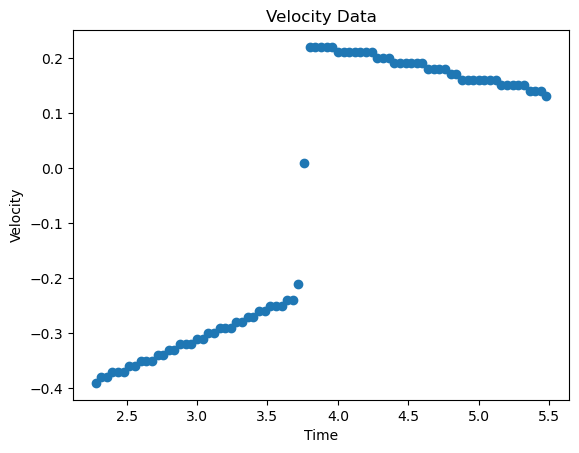

In [244]:
Data = [[2.28,-0.39],[2.32,-0.38],[2.36,-0.38],[2.4,-0.37],[2.44,-0.37],[2.48,-0.37],[2.52,-0.36],[2.56,-0.36],[2.6,-0.35],[2.64,-0.35],[2.68,-0.35],[2.72,-0.34],[2.76,-0.34],[2.8,-0.33],[2.84,-0.33],[2.88,-0.32],[2.92,-0.32],[2.96,-0.32],[3.,-0.31],[3.04,-0.31],[3.08,-0.3],[3.12,-0.3],[3.16,-0.29],[3.2,-0.29],[3.24,-0.29],[3.28,-0.28],[3.32,-0.28],[3.36,-0.27],[3.4,-0.27],[3.44,-0.26],[3.48,-0.26],[3.52,-0.25],[3.56,-0.25],[3.6,-0.25],[3.64,-0.24],[3.68,-0.24],[3.72,-0.21],[3.76,0.01],[3.8,0.22],[3.84,0.22],[3.88,0.22],[3.92,0.22],[3.96,0.22],[4.,0.21],[4.04,0.21],[4.08,0.21],[4.12,0.21],[4.16,0.21],[4.2,0.21],[4.24,0.21],[4.28,0.2],[4.32,0.2],[4.36,0.2],[4.4,0.19],[4.44,0.19],[4.48,0.19],[4.52,0.19],[4.56,0.19],[4.6,0.19],[4.64,0.18],[4.68,0.18],[4.72,0.18],[4.76,0.18],[4.8,0.17],[4.84,0.17],[4.88,0.16],[4.92,0.16],[4.96,0.16],[5.,0.16],[5.04,0.16],[5.08,0.16],[5.12,0.16],[5.16,0.15],[5.2,0.15],[5.24,0.15],[5.28,0.15],[5.32,0.15],[5.36,0.14],[5.4,0.14],[5.44,0.14],[5.48,0.13]]
velData = [i[1] for i in Data]
timeData = [i[0] for i in Data]

plt.plot(timeData, velData, 'o')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity Data')
plt.show()

By looking at the velocity data, we can see that the collision occurs at about t = 3.76s. We can find the element in the list that corresponds to that time.

In [245]:
collTime = [i for i,k in enumerate(timeData) if k==3.76][0]
print(collTime)

37


We will have to use two separate fits: One for the first half (before the collision) and another fro the second half (afterwards). We can separate different partitions of the data by doing the following:

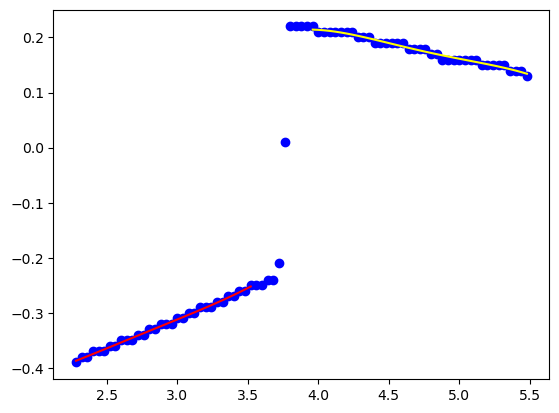

In [259]:
velData_1 = velData[:collTime-5]
timeData_1 = timeData[:collTime-5]

velData_2 = velData[collTime+5:]
timeData_2 = timeData[collTime+5:]

import numpy as np

poly = np.polyfit(timeData_1, velData_1, deg=4)
initialFit = np.polyval(poly,timeData_1)

poly2 = np.polyfit(timeData_2, velData_2, deg=4)
finalFit = np.polyval(poly2,timeData_2)

plt.plot(timeData, velData, 'o', color='blue')
plt.plot(timeData_1, initialFit, color='red')
plt.plot(timeData_2, finalFit, color='yellow')
plt.show()

Now lets find the velocity of the fitted equation at the collision time (t=3.76s), and the corresponding error.

In [292]:
estimated_variance = np.var(initialFit,ddof=1)
vi = np.polyval(poly, 3.76)
Δvi = np.sqrt(estimated_variance)
print("vi: ", vi, "Δvi: ",  Δvi)

estimated_variance_f = np.var(finalFit,ddof=1)
vf = np.polyval(poly2, 3.76)
Δvf = np.sqrt(estimated_variance_f)
print("vf: ", vf, "Δvf: ", Δvf)


vi:  -0.2153806163861296 Δvi:  0.040227518555219464
vf:  0.20938588343450348 Δvf:  0.024980993240406903


So the total change in velocity during the collision is: 

In [295]:
vChange = vf - vi
print(vChange)

0.4247664998206331


With an uncertainty of: 

In [297]:
ΔvChange = (Δvf**2 + Δvi**2)**(1/2)
print(ΔvChange)

0.04735296476872152


<h3>Sample Impulse Analysis</h3>
Using LoggerPro, we can find the acceleration of each cart as a function of time, which (after some work) will look something like this:

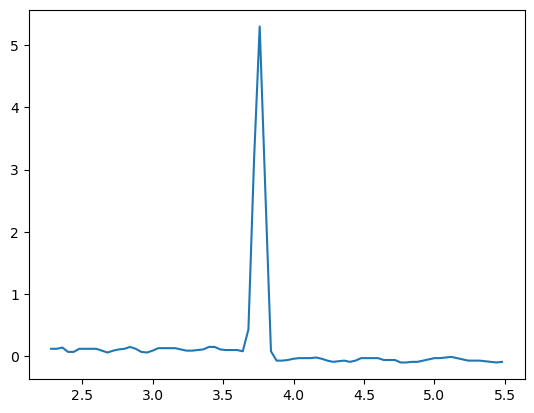

In [303]:
rawAccelData = [[2.28,0.12],[2.32,0.12],[2.36,0.14],[2.4,0.07],[2.44,0.07],[2.48,0.12],[2.52,0.12],[2.56,0.12],[2.6,0.12],[2.64,0.09],[2.68,0.06],[2.72,0.09],[2.76,0.11],[2.8,0.12],[2.84,0.15],[2.88,0.12],[2.92,0.07],[2.96,0.06],[3.,0.09],[3.04,0.13],[3.08,0.13],[3.12,0.13],[3.16,0.13],[3.2,0.11],[3.24,0.09],[3.28,0.09],[3.32,0.1],[3.36,0.11],[3.4,0.15],[3.44,0.15],[3.48,0.11],[3.52,0.1],[3.56,0.1],[3.6,0.1],[3.64,0.08],[3.68,0.43],[3.72,3.16],[3.76,5.3],[3.8,2.66],[3.84,0.08],[3.88,-0.07],[3.92,-0.07],[3.96,-0.06],[4.,-0.04],[4.04,-0.03],[4.08,-0.03],[4.12,-0.03],[4.16,-0.02],[4.2,-0.04],[4.24,-0.07],[4.28,-0.09],[4.32,-0.08],[4.36,-0.07],[4.4,-0.09],[4.44,-0.07],[4.48,-0.03],[4.52,-0.03],[4.56,-0.03],[4.6,-0.03],[4.64,-0.06],[4.68,-0.06],[4.72,-0.06],[4.76,-0.1],[4.8,-0.1],[4.84,-0.09],[4.88,-0.09],[4.92,-0.07],[4.96,-0.05],[5.,-0.03],[5.04,-0.03],[5.08,-0.02],[5.12,-0.01],[5.16,-0.03],[5.2,-0.05],[5.24,-0.07],[5.28,-0.07],[5.32,-0.07],[5.36,-0.08],[5.4,-0.09],[5.44,-0.1],[5.48,-0.09]]

accelData = [i[1] for i in rawAccelData]

plt.plot(timeData, accelData)
plt.show()

Integration of this acceleration will yield the total change in velocity. An easy way to do this is to take a Riemann sum of the acceleration from a time just before the collision to a time just after the collision.<br>
the Riemman sum of a function $f(t)$ is $\sum_{n=1}^{N} f(t) \Delta t$ <br>
(If you have questions on how to perform this Riemman sum, please ask the lab instructor.) <br>
We do not want to integrate the entire data set, only the data around the time of the collision, we will separate out only the data around the collision.

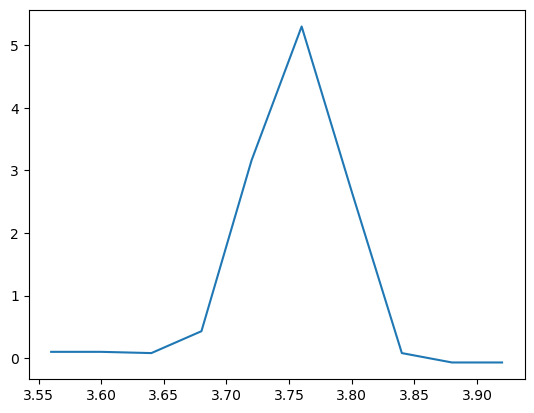

In [316]:
accelColl = accelData[collTime-5:collTime+5]
accelTimeColl = timeData[collTime-5:collTime+5]

plt.plot(accelTimeColl, accelColl)
plt.show()

Now taking the Riemann sum ($\Delta t \rightarrow 0.04$ for the above data set), we find the change in velocity using the impulse formalism.

In [320]:
Δt = 0.04
print(sum([i * Δt for i in accelColl]))

0.47079999999999994


What is a reasonable uncertainty for this quantity? To do the revelant comparisons, you'll have to make some estimate, so think deeply about this (and/or ask me about it and I'll try to help).
<br>

Compare these results to the change in velocity from above:

In [322]:
print(vChange)
print(ΔvChange)

0.4247664998206331
0.04735296476872152


Theoretically, they should be equal (within uncertainties). Are they? Why or why not?

<h2>Upshot</h2>
This is a rough outline of the experiment. <i>This is not necessarily a complete list of what needs to be done.</i>
<br>
1) Set up the equipment and take data for:
<br>
1. One cart stationary at the end of the track (stays stationary), the other collides <u>elastically</u>;
<br>
2a. Carts different sizes, one moves and collides <u>elastically</u> with other, stationary;
<br>
2b. Carts close to same size, both moving and collide <u>elastically</u>;
<br>
3a. Carts different sizes, one moves and collides <u>completely inelastically</u> with other, stationary;
<br>
3b. Carts close to same size, both moving and collide <u>completely inelastically</u>;
<br>
You must do Case 1, and can choose to do <i>either</i> 2a or 2b, and <i>either</i> 3a or 3b; you will have data for three experiments.

<br>
2) For each experiment, export Position and Velocity data from Data Studio, and export Force data from Logger ppro.
<br>
3) Perform fits on the velocity data; find the change in velocity during the collision directly from the fits. Then find the acceleration from the Force data, and integrate it across the collision to find the change in velocity.
<br>
4) Compare the results of Parts 3 and 4 for each data set, with uncertainties. Make sure to think about and address the questions I have asked at the end of each section above!
<br>
5)
Of course, address the question of momentum and energy conservation. In which collision (if any) was momentum or energy consereved? Why or why not?

<h2>Assignment</h2>
The assignment for Week 9 is a <u>full Lab Report</u> which addresses all relevant questions from this writeup, and reflects on each. This report should be written in accordance with the general rules and guidelines of the Syllabus for this course; please ask if there are any questions about what specifically is required.